In [30]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [37]:
raw_csv = pd.read_csv("Absenteeism_data.csv")
raw_csv.head()

,ID,Reason for Absence,Seasons,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Social smoker,Social drinker,Service time,Pets,Absenteeism Time in Hours
0,11,26,1,7/7/2015,289,36,33,239.554,30,1,2,0,1,13,1,4
1,36,0,1,14/07/2015,118,13,50,239.554,31,1,1,0,1,18,0,0
2,3,23,1,15/07/2015,179,51,38,239.554,31,1,0,0,1,18,0,2
3,7,7,1,16/07/2015,279,5,39,239.554,24,1,2,1,1,14,0,4
4,11,23,1,23/07/2015,289,36,33,239.554,30,1,2,0,1,13,1,2


In [38]:
raw_csv.dtypes

ID                             int64
Reason for Absence             int64
Seasons                        int64
Date                          object
Transportation Expense         int64
Distance to Work               int64
Age                            int64
Daily Work Load Average      float64
Body Mass Index                int64
Education                      int64
Children                       int64
Social smoker                  int64
Social drinker                 int64
Service time                   int64
Pets                           int64
Absenteeism Time in Hours      int64
dtype: object

In [39]:
#making a new copy
df = raw_csv.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
ID                           700 non-null int64
Reason for Absence           700 non-null int64
Seasons                      700 non-null int64
Date                         700 non-null object
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Social smoker                700 non-null int64
Social drinker               700 non-null int64
Service time                 700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: float64(1), int64(14), object(1)
memory usage: 87.6+ KB


In [44]:
#droping the variables which would not have effect on analysis

#drop id
df = df.drop(['ID'], axis = 1)
df.head()

,Reason for Absence,Seasons,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Social smoker,Social drinker,Service time,Pets,Absenteeism Time in Hours
0,26,1,7/7/2015,289,36,33,239.554,30,1,2,0,1,13,1,4
1,0,1,14/07/2015,118,13,50,239.554,31,1,1,0,1,18,0,0
2,23,1,15/07/2015,179,51,38,239.554,31,1,0,0,1,18,0,2
3,7,1,16/07/2015,279,5,39,239.554,24,1,2,1,1,14,0,4
4,23,1,23/07/2015,289,36,33,239.554,30,1,2,0,1,13,1,2


### Variable: Reason for Absence
#### Description of the codes for Reason for Absence
1 Certain infectious and parasitic diseases  
2 Neoplasms  
3 Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
4 Endocrine, nutritional and metabolic diseases  
5 Mental and behavioural disorders  
6 Diseases of the nervous system  
7 Diseases of the eye and adnexa  
8 Diseases of the ear and mastoid process  
9 Diseases of the circulatory system  
10 Diseases of the respiratory system  
11 Diseases of the digestive system  
12 Diseases of the skin and subcutaneous tissue  
13 Diseases of the musculoskeletal system and connective tissue  
14 Diseases of the genitourinary system  
15 Pregnancy, childbirth and the puerperium  
16 Certain conditions originating in the perinatal period  
17 Congenital malformations, deformations and chromosomal abnormalities 

18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
19 Injury, poisoning and certain other consequences of external causes  
20 External causes of morbidity and mortality  
21 Factors influencing health status and contact with health services

22 patient follow-up 

23 medical consultation 

24 blood donation 

25 laboratory examination 

26 unjustified absence 

27 physiotherapy 

28 dental consultation 


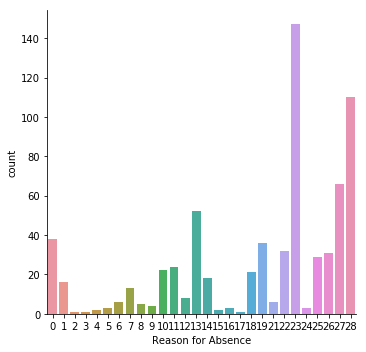

In [43]:
#plt.figure(figsize=(16, 10))
sb.catplot(x="Reason for Absence", kind="count", data=df)


In [46]:
#converting 'Reason for Absence' to dummy variable and dropping column 0
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first= True)
reason_columns.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### Why did we drop first reason?
If a person has been absent due to reason 0, this means they have been away from work for an unknown reason. Hence, this column acts like the baseline, and all the rest are represented in comparison to this.

As a consequence, dropping this column would allow us to only conduct the analysis for the reasons we are aware of. And that’s exactly what we want to do - explore whether or not a specific known reason for absence induces an individual to be excessively absent from work. That’s why we don’t really need to keep in our data set information about someone who has been away due to an unknown reason.

We will now combine the original dataset and reason_columns. But we already have a column 'Reason for Absence' which has the same information as that of reason_columns. This gives rise to multicollinearity.
Let us drop 'Reason for Absence' from data set.

In [47]:
df = df.drop(['Reason for Absence'], axis = 1)
df.head()

,Seasons,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Social smoker,Social drinker,Service time,Pets,Absenteeism Time in Hours
0,1,7/7/2015,289,36,33,239.554,30,1,2,0,1,13,1,4
1,1,14/07/2015,118,13,50,239.554,31,1,1,0,1,18,0,0
2,1,15/07/2015,179,51,38,239.554,31,1,0,0,1,18,0,2
3,1,16/07/2015,279,5,39,239.554,24,1,2,1,1,14,0,4
4,1,23/07/2015,289,36,33,239.554,30,1,2,0,1,13,1,2


### Grouping dummy variables
We have 28 variables, we can group the variables with similar characteristics together for further analysis.

-  Group 1: 1 yo 14 (related to disease)
-  Group 2: 15 to 17 (related to pregnancy/giving birth) 
-  Group 3: 18 to 21 (about poisoning/injury/not classified)
-  Group 22 to 28 (consultation/unjustified absence)

In [48]:
reason_type1 = reason_columns.loc[:, 1:14].max(axis = 1)
reason_type2 = reason_columns.loc[:, 15:17].max(axis = 1)
reason_type3 = reason_columns.loc[:, 18:21].max(axis = 1)
reason_type4 = reason_columns.loc[:, 22:].max(axis = 1)

In [49]:
#concatinate these columns to df
df = pd.concat([df, reason_type1, reason_type2, reason_type3, reason_type4], axis = 1)
df.head()

,Seasons,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Social smoker,Social drinker,Service time,Pets,Absenteeism Time in Hours,0,1,2,3
0,1,7/7/2015,289,36,33,239.554,30,1,2,0,1,13,1,4,0,0,0,1
1,1,14/07/2015,118,13,50,239.554,31,1,1,0,1,18,0,0,0,0,0,0
2,1,15/07/2015,179,51,38,239.554,31,1,0,0,1,18,0,2,0,0,0,1
3,1,16/07/2015,279,5,39,239.554,24,1,2,1,1,14,0,4,1,0,0,0
4,1,23/07/2015,289,36,33,239.554,30,1,2,0,1,13,1,2,0,0,0,1


#### Assign Column Names to newly created columns

In [51]:
df.columns.values

array(['Seasons', 'Date', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Social smoker', 'Social drinker', 'Service time',
       'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3], dtype=object)

In [54]:
column_names = ['Seasons', 'Date', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Social smoker', 'Social drinker', 'Service time',
       'Pets', 'Absenteeism Time in Hours', 'Reason 1', 'Reason 2', 'Reason 3', 'Reason 4']

In [55]:
df.columns = column_names
df.head()

,Seasons,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Social smoker,Social drinker,Service time,Pets,Absenteeism Time in Hours,Reason 1,Reason 2,Reason 3,Reason 4
0,1,7/7/2015,289,36,33,239.554,30,1,2,0,1,13,1,4,0,0,0,1
1,1,14/07/2015,118,13,50,239.554,31,1,1,0,1,18,0,0,0,0,0,0
2,1,15/07/2015,179,51,38,239.554,31,1,0,0,1,18,0,2,0,0,0,1
3,1,16/07/2015,279,5,39,239.554,24,1,2,1,1,14,0,4,1,0,0,0
4,1,23/07/2015,289,36,33,239.554,30,1,2,0,1,13,1,2,0,0,0,1


#### Reorder columns - move reason columns at the start

In [56]:
column_names_reordered = ['Reason 1', 'Reason 2', 'Reason 3', 'Reason 4','Seasons', 'Date', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Social smoker', 'Social drinker', 'Service time',
       'Pets', 'Absenteeism Time in Hours']

In [57]:
df = df[column_names_reordered]
df.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Seasons,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Social smoker,Social drinker,Service time,Pets,Absenteeism Time in Hours
0,0,0,0,1,1,7/7/2015,289,36,33,239.554,30,1,2,0,1,13,1,4
1,0,0,0,0,1,14/07/2015,118,13,50,239.554,31,1,1,0,1,18,0,0
2,0,0,0,1,1,15/07/2015,179,51,38,239.554,31,1,0,0,1,18,0,2
3,1,0,0,0,1,16/07/2015,279,5,39,239.554,24,1,2,1,1,14,0,4
4,0,0,0,1,1,23/07/2015,289,36,33,239.554,30,1,2,0,1,13,1,2


### Creating Checkpoint
create a copy of current state of data frame

In [79]:
df_reason_mod = df.copy()
df_reason_mod.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Seasons,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Social smoker,Social drinker,Service time,Pets,Absenteeism Time in Hours
0,0,0,0,1,1,7/7/2015,289,36,33,239.554,30,1,2,0,1,13,1,4
1,0,0,0,0,1,14/07/2015,118,13,50,239.554,31,1,1,0,1,18,0,0
2,0,0,0,1,1,15/07/2015,179,51,38,239.554,31,1,0,0,1,18,0,2
3,1,0,0,0,1,16/07/2015,279,5,39,239.554,24,1,2,1,1,14,0,4
4,0,0,0,1,1,23/07/2015,289,36,33,239.554,30,1,2,0,1,13,1,2


### Analysis of Date Column

In [80]:
#date to timestamp
df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'], format = '%d/%m/%Y')
type(df_reason_mod['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### Splitting month and date from Date column

In [81]:
#Extract month
df_reason_mod['Date'][0].month

7

In [82]:
list_months =[]
for i in range(700):
    list_months.append(df_reason_mod['Date'][i].month)
    
list_months

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 

In [83]:
#adding month column to df_reason_mod
df_reason_mod['month'] = list_months
df_reason_mod.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Seasons,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Social smoker,Social drinker,Service time,Pets,Absenteeism Time in Hours,month
0,0,0,0,1,1,2015-07-07,289,36,33,239.554,30,1,2,0,1,13,1,4,7
1,0,0,0,0,1,2015-07-14,118,13,50,239.554,31,1,1,0,1,18,0,0,7
2,0,0,0,1,1,2015-07-15,179,51,38,239.554,31,1,0,0,1,18,0,2,7
3,1,0,0,0,1,2015-07-16,279,5,39,239.554,24,1,2,1,1,14,0,4,7
4,0,0,0,1,1,2015-07-23,289,36,33,239.554,30,1,2,0,1,13,1,2,7


In [84]:
#Extract date: day of week
#Monday = 0, Tuesday = 1,.................Sunday =6
df_reason_mod['Date'][0].weekday()

1

In [85]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [86]:
df_reason_mod['Day of the Week'] = df_reason_mod['Date'].apply(date_to_weekday)

In [87]:
df_reason_mod.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Seasons,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Social smoker,Social drinker,Service time,Pets,Absenteeism Time in Hours,month,Day of the Week
0,0,0,0,1,1,2015-07-07,289,36,33,239.554,30,1,2,0,1,13,1,4,7,1
1,0,0,0,0,1,2015-07-14,118,13,50,239.554,31,1,1,0,1,18,0,0,7,1
2,0,0,0,1,1,2015-07-15,179,51,38,239.554,31,1,0,0,1,18,0,2,7,2
3,1,0,0,0,1,2015-07-16,279,5,39,239.554,24,1,2,1,1,14,0,4,7,3
4,0,0,0,1,1,2015-07-23,289,36,33,239.554,30,1,2,0,1,13,1,2,7,3


In [88]:
#Re-order columns
df_reason_mod.columns.values

array(['Reason 1', 'Reason 2', 'Reason 3', 'Reason 4', 'Seasons', 'Date',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Social smoker', 'Social drinker', 'Service time',
       'Pets', 'Absenteeism Time in Hours', 'month', 'Day of the Week'],
      dtype=object)

In [89]:
new_order = ['Reason 1', 'Reason 2', 'Reason 3', 'Reason 4','month', 'Day of the Week', 'Seasons', 'Date',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Social smoker', 'Social drinker', 'Service time',
       'Pets', 'Absenteeism Time in Hours']

In [90]:
df_reason_mod = df_reason_mod[new_order]
df_reason_mod.head()

,Reason 1,Reason 2,Reason 3,Reason 4,month,Day of the Week,Seasons,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Social smoker,Social drinker,Service time,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,1,2015-07-07,289,36,33,239.554,30,1,2,0,1,13,1,4
1,0,0,0,0,7,1,1,2015-07-14,118,13,50,239.554,31,1,1,0,1,18,0,0
2,0,0,0,1,7,2,1,2015-07-15,179,51,38,239.554,31,1,0,0,1,18,0,2
3,1,0,0,0,7,3,1,2015-07-16,279,5,39,239.554,24,1,2,1,1,14,0,4
4,0,0,0,1,7,3,1,2015-07-23,289,36,33,239.554,30,1,2,0,1,13,1,2


In [91]:
#drop date column
df_reason_mod = df_reason_mod.drop(['Date'], axis = 1)


In [92]:
df_reason_mod.head()

,Reason 1,Reason 2,Reason 3,Reason 4,month,Day of the Week,Seasons,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Social smoker,Social drinker,Service time,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,1,289,36,33,239.554,30,1,2,0,1,13,1,4
1,0,0,0,0,7,1,1,118,13,50,239.554,31,1,1,0,1,18,0,0
2,0,0,0,1,7,2,1,179,51,38,239.554,31,1,0,0,1,18,0,2
3,1,0,0,0,7,3,1,279,5,39,239.554,24,1,2,1,1,14,0,4
4,0,0,0,1,7,3,1,289,36,33,239.554,30,1,2,0,1,13,1,2


## Data Viz to see which month and day we have more absenteeism

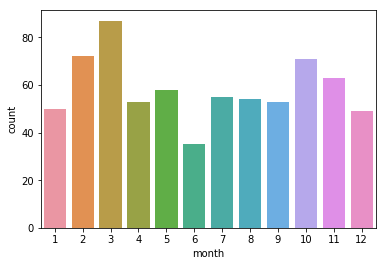

In [93]:
sb.countplot(x = 'month', data = df_reason_mod)

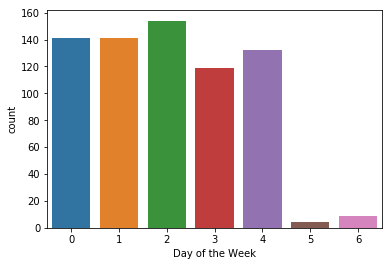

In [94]:
sb.countplot(x = 'Day of the Week', data = df_reason_mod)

As we have the data for months and day of the week, we would drop the column Season

In [95]:
df_reason_mod = df_reason_mod.drop(['Seasons'], axis = 1)

### Variable: Education

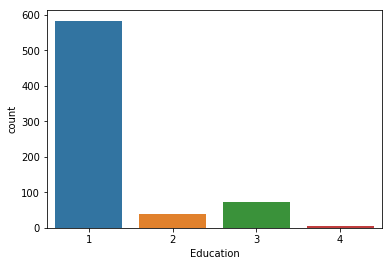

In [97]:
sb.countplot(x = 'Education', data = df_reason_mod)

### Transform Education column to dummy variable
1 High School

2 Graduate

3 Post Graduate

4 A masters or a doctor

Let us indicate 'High School' by 0 and the other three by 1

In [99]:
df_reason_mod['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [100]:
df_reason_mod['Education'] = df_reason_mod['Education'].map({1:0, 3:1, 2:1, 4:1})
df_reason_mod['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

### Checkpoint

In [101]:
df_final = df_reason_mod.copy()
df_final.head()

,Reason 1,Reason 2,Reason 3,Reason 4,month,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Social smoker,Social drinker,Service time,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,0,1,13,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,1,18,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,1,18,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,1,1,14,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,0,1,13,1,2


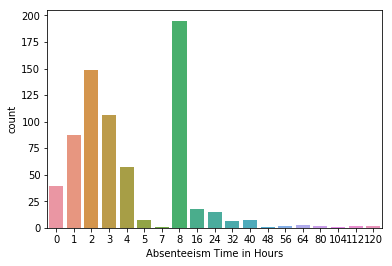

In [102]:
#Absenteeism time
sb.countplot(x = 'Absenteeism Time in Hours', data = df_reason_mod)

In [103]:
#make a csv copy of the final data
df_final.to_csv('final_data.csv', index = False)